This case study analyzes a dataset from Kaggle obtained from a survey of Portuguese students final exam grades in secondary school. I picked this dataset as many young adults start drinking prior to college, analyzing secondary school drinking data can provide us with effective insights to curtail drinking habits at a young age, at a student's growing and formative years prior to college.

The questions I aim to answer are:
What is the gender representation in this dataset?
Is the age distribution in this dataset representative of a pre-college age group?
To what extent does workday alcohol consumption affect final grades in this dataset?

In [48]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns                  
sns.set()  

In [49]:
df = pd.read_csv("https://raw.githubusercontent.com/aarthishivkumar/alcohol-analysis/main/student-mat.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [50]:
df.shape

(395, 33)

In [51]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [53]:
df = df.dropna()
df
#no missing values

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [54]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [55]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [56]:
df.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
45,GP,F,15,U,LE3,A,4,3,other,other,...,5,2,2,1,1,5,8,8,8,6
47,GP,M,16,U,GT3,T,4,3,health,services,...,4,2,2,1,1,2,4,19,19,20
355,MS,F,18,U,GT3,T,3,3,services,services,...,5,3,4,1,1,5,0,10,9,9
370,MS,F,19,U,LE3,T,3,2,services,services,...,3,2,2,1,1,3,4,7,7,9
13,GP,M,15,U,GT3,T,4,3,teacher,other,...,5,4,3,1,2,3,2,10,10,11
263,GP,F,17,U,GT3,T,3,3,other,other,...,3,2,3,1,1,4,4,10,9,9
276,GP,F,18,R,GT3,A,3,2,other,services,...,4,1,1,1,1,5,75,10,9,9
235,GP,M,16,U,GT3,T,3,2,at_home,other,...,5,3,3,1,3,2,10,11,9,10
165,GP,M,16,U,GT3,T,3,2,services,services,...,4,5,2,1,1,2,16,12,11,12
19,GP,M,16,U,LE3,T,4,3,health,other,...,3,1,3,1,3,5,4,8,10,10


In [57]:
df.sort_values('G3', ascending=False, inplace = True)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
47,GP,M,16,U,GT3,T,4,3,health,services,...,4,2,2,1,1,2,4,19,19,20
113,GP,M,15,U,LE3,T,4,2,teacher,other,...,3,5,2,1,1,3,10,18,19,19
110,GP,M,15,U,LE3,A,4,4,teacher,teacher,...,5,5,3,1,1,4,6,18,19,19
286,GP,F,18,U,GT3,T,2,2,at_home,at_home,...,4,3,3,1,2,2,5,18,18,19
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,GP,M,17,R,LE3,T,2,1,at_home,other,...,3,3,2,2,2,5,0,7,6,0
162,GP,M,16,U,LE3,T,1,2,other,other,...,4,4,4,2,4,5,0,7,0,0
168,GP,F,16,U,GT3,T,2,2,other,other,...,5,1,5,1,1,4,0,6,7,0
367,MS,F,17,R,GT3,T,1,1,other,services,...,5,2,1,1,2,1,0,7,6,0


(18,)

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
4      1
20     1
Name: G3, dtype: int64

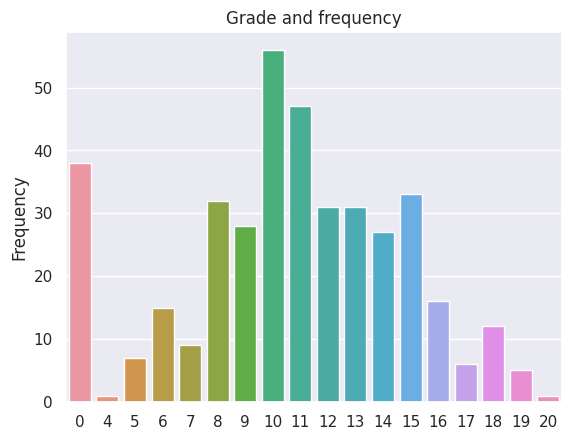

In [58]:
Frequency = df['G3'].value_counts() 
display(Frequency.shape, Frequency)
sns.barplot(x=Frequency.index, y=Frequency)
plt.title('Grade and frequency') 
plt.ylabel('Frequency') 
plt.show()

From this bar plot, we can see that the most common grade obtained was 10.

In [59]:
df_gender_final_grades = df.groupby('sex', as_index=False).agg({'G3': 'mean'})
df_gender_final_grades

,sex,G3
0,F,9.966346
1,M,10.914439


The average grade for males and females are not significantly different, with males having a slightly higher final grade than females.

In [60]:
fig = px.box(df,
             x='G3',
             y='sex',
             orientation='h',
             title='Final grade Distribution by Gender')
fig.show()

From the boxplot above, we can see that male students in this dataset generally have higher grades than female students. The student(s) who scored full points of 20 are from the male sex.

In [61]:
fig = px.pie(
    df,
    names='sex',
    title='gender breakdown in dataset',
    width=800,
    height=700
)

fig.show()

The gender representation is this dataset is almost equal, with 5% more males being present than females.

In [62]:
fig = px.scatter(df, x='Dalc', y='G3', title='Grades by workday alcohol consumption')
fig.show()

From this scatterplot, we can generally see that higher final grades, such as a G3 of 20 or 18 are associated with low levels of alcohol consumption, levels 1 and 2.

In [63]:
fig = px.pie(
    df,
    names='age',
    title='age breakdown in dataset',
    width=800,
    height=700
)

fig.show()

In [64]:
df[df.sex == "F"]['G3'].median()

10.0

In [65]:
df[df.sex == "M"]['G3'].median()

11.0

We can see that both genders have similar medians and we will be using this to provide recommendations to both genders about how to be in the 50th percentile of the class, as that typically means students are performing decently in their academics.

This is to validate that most of the students in this dataset are of a pre college age. We can see that majority are from ages 15-18.

In [66]:
df_male_median = df[(df.sex == "M") & (df.G3 >= 11)]
df_male_median 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
47,GP,M,16,U,GT3,T,4,3,health,services,...,4,2,2,1,1,2,4,19,19,20
113,GP,M,15,U,LE3,T,4,2,teacher,other,...,3,5,2,1,1,3,10,18,19,19
110,GP,M,15,U,LE3,A,4,4,teacher,teacher,...,5,5,3,1,1,4,6,18,19,19
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
42,GP,M,15,U,GT3,T,4,4,services,teacher,...,4,3,3,1,1,5,2,19,18,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,GP,M,16,U,LE3,A,3,4,services,other,...,5,3,3,1,1,5,4,11,11,11
354,MS,M,17,R,GT3,T,4,3,services,other,...,4,5,5,1,3,2,4,13,11,11
257,GP,M,19,U,LE3,A,4,3,services,at_home,...,4,3,1,1,1,1,12,11,11,11
29,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,4,4,5,5,5,5,16,10,12,11


In [67]:
df_female_median = df[(df.sex == "F") & (df.G3 >= 10)]
df_female_median 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
286,GP,F,18,U,GT3,T,2,2,at_home,at_home,...,4,3,3,1,2,2,5,18,18,19
374,MS,F,18,R,LE3,T,4,4,other,other,...,5,4,4,1,1,1,0,19,18,19
91,GP,F,15,U,GT3,T,4,3,services,other,...,4,5,5,1,3,1,4,16,17,18
198,GP,F,17,U,GT3,T,4,4,services,teacher,...,4,2,4,2,3,2,24,18,18,18
293,GP,F,17,R,LE3,T,3,1,services,other,...,3,1,2,1,1,3,6,18,18,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,GP,F,18,R,GT3,T,1,1,at_home,other,...,5,2,5,1,5,4,6,9,8,10
152,GP,F,15,R,GT3,T,3,3,services,services,...,4,2,1,2,3,3,8,10,10,10
339,GP,F,17,R,GT3,A,3,2,other,other,...,4,3,3,2,3,2,4,9,10,10
274,GP,F,17,U,GT3,T,2,4,at_home,health,...,4,3,3,1,1,1,2,10,10,10


(5,)

1    72
2    19
3     8
5     5
4     2
Name: Dalc, dtype: int64

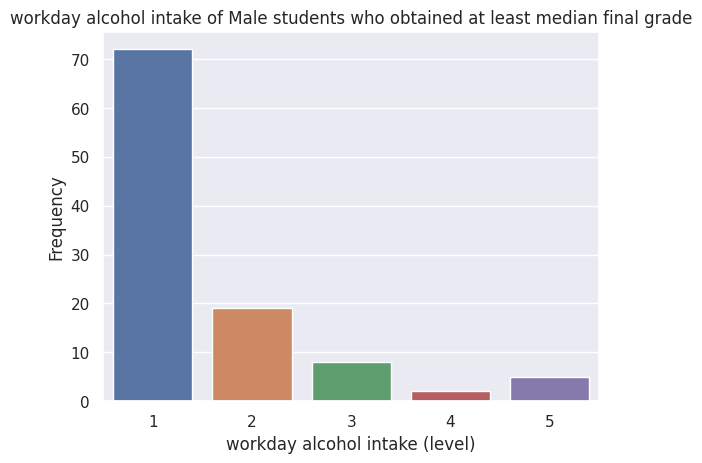

In [71]:
Frequency = df_male_median['Dalc'].value_counts() 
display(Frequency.shape, Frequency)
sns.barplot(x=Frequency.index, y=Frequency)
plt.title('workday alcohol intake of Male students who obtained at least median final grade') 
plt.xlabel('workday alcohol intake (level)') 
plt.ylabel('Frequency') 
plt.show()

(5,)

1    107
2     20
3      3
4      2
5      1
Name: Dalc, dtype: int64

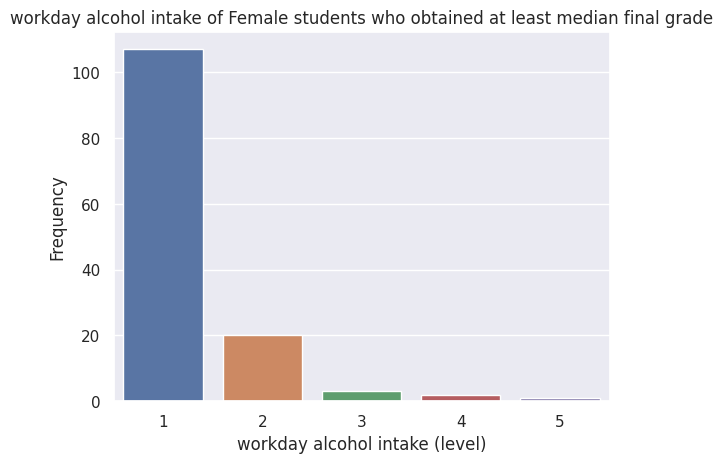

In [70]:
Frequency = df_female_median['Dalc'].value_counts() 
display(Frequency.shape, Frequency)
sns.barplot(x=Frequency.index, y=Frequency)
plt.title('workday alcohol intake of Female students who obtained at least median final grade') 
plt.xlabel('workday alcohol intake (level)') 
plt.ylabel('Frequency') 
plt.show()

From these bar charts, we can see that a majority of students who obtained at least the median grade comes from mostly level 1 and level 2 for both males and female, which suggests that there seems to be an association between workday alcohol consumption and grades in students. Students in the 50th percentile and above tend to consume lesser alcohol. However, we still see a significant number of male students in the 50th percentile and above who seem to consume levels 3 to 5 of alcohol, and a few female students who consume levels 3 to 5 as well. Therefore, I conclude that alcohol consumption on a workday does affect academic performance to a certain extent, but not to a large extent for both genders. Nevertheless, based on the results, I would advice that students keep their alcohol intake on a workday to a minimum and at level 2 at most.